In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('concrete_data.csv')

In [3]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

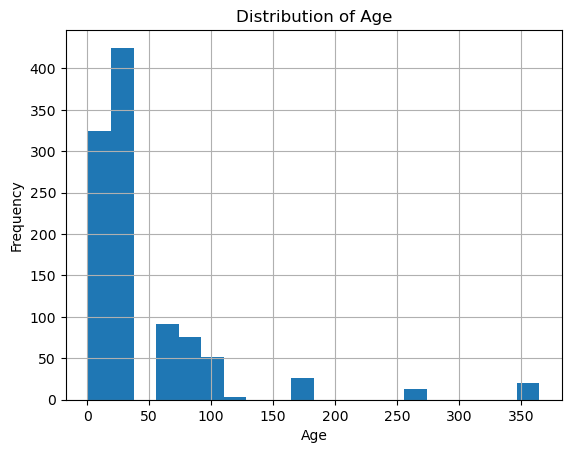

In [8]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


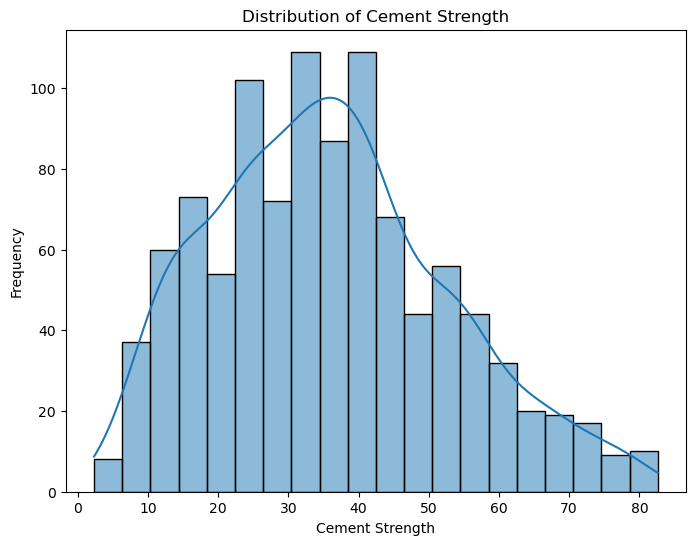

In [9]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Strength'], bins=20, kde=True)  # Replace 'Strength' with your actual target column name
plt.title('Distribution of Cement Strength')
plt.xlabel('Cement Strength')
plt.ylabel('Frequency')
plt.show()




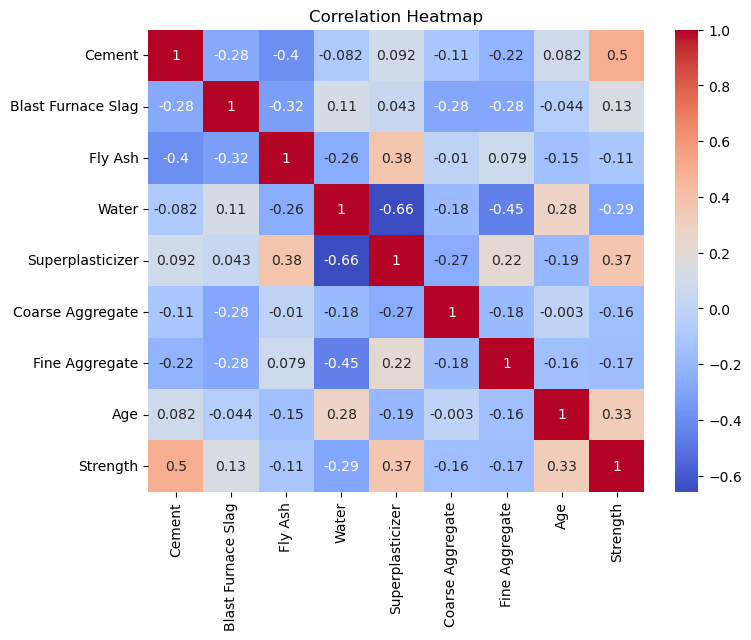

In [10]:
# Visualize correlations between features and the target variable
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#
X = df.drop('Strength', axis=1)
y = df['Strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [13]:
# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Train models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict on the test set
linear_preds = linear_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)
lasso_preds = lasso_model.predict(X_test)

# Calculate mean squared error
linear_mse = mean_squared_error(y_test, linear_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)

print("Linear Regression MSE:", linear_mse)
print("Ridge Regression MSE:", ridge_mse)
print("Lasso Regression MSE:", lasso_mse)


Linear Regression MSE: 95.97094009110677
Ridge Regression MSE: 95.97089554036006
Lasso Regression MSE: 95.95939109138305


In [14]:
mse_values = {'Linear Regression': linear_mse, 'Ridge Regression': ridge_mse, 'Lasso Regression': lasso_mse}

# Find the best model
best_model = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_model]

print("Best Model:", best_model)
print("Best MSE:", best_mse)


Best Model: Lasso Regression
Best MSE: 95.95939109138305


In [15]:
# Create a neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])


nn_model.compile(optimizer='adam', loss='mean_squared_error')

nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

nn_preds = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_preds)

print("Neural Network MSE:", nn_mse)


7/7 [==============================] - 0s 2ms/step
Neural Network MSE: 38.52358509758495
